# ***Task 6 - Prediction Using Decision Tree Algorithm***

 # Importing Libraries 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Loading DataSet Iris.csv

In [2]:
df = pd.read_csv("E:\R VIGNESH KUMAR\Iris.csv")

# Information of the DataSet

In [3]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
print(df.shape)

(150, 6)


In [6]:
for n,colu in enumerate(df.columns):
    print(f'Column number {1+n} is {colu}')

Column number 1 is Id
Column number 2 is SepalLengthCm
Column number 3 is SepalWidthCm
Column number 4 is PetalLengthCm
Column number 5 is PetalWidthCm
Column number 6 is Species


In [7]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


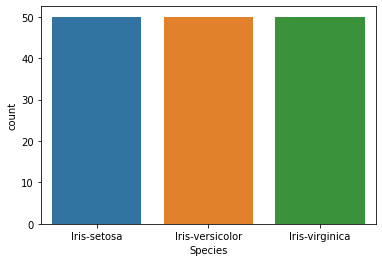

In [9]:
sns.countplot(df['Species'])
plt.show()

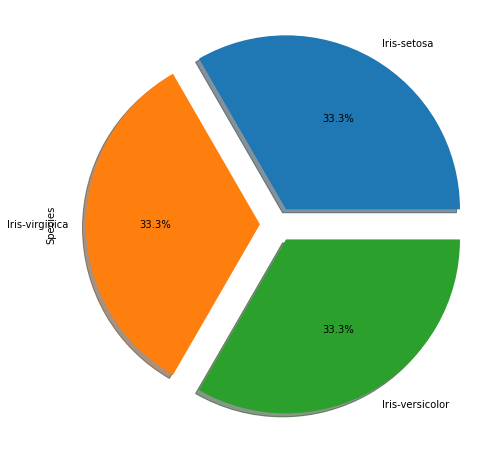

In [10]:
df['Species'].value_counts().plot.pie(explode=[0.1,0.1,0.1],autopct='%1.1f%%',shadow=True,figsize=(10,8))
plt.show()

# Encode target labels with value between 0 and n_classes-1.

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
dd = LabelEncoder()

In [13]:
df['target'] = dd.fit_transform(df['Species']) 

# This transformer should be used to encode target values

In [14]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,target
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,2
146,147,6.3,2.5,5.0,1.9,Iris-virginica,2
147,148,6.5,3.0,5.2,2.0,Iris-virginica,2
148,149,6.2,3.4,5.4,2.3,Iris-virginica,2


# Droping the Species record

In [15]:
df = df.drop(['Species'],axis=1)

In [16]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,target
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


 # Dividing the data into inputs and outputs.

In [17]:
X=df.drop('target',axis=1)
y=df.target

# Spliting the data into training and test sets.

In [18]:
from sklearn.model_selection import train_test_split


In [19]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

# Trianing the Model using DecisionTreeClassifier() Class

In [20]:
from sklearn import tree

In [21]:
model = tree.DecisionTreeClassifier()

In [22]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [23]:
y_pred = model.predict(X_test)

# Actual Values vs Predicted Values

In [24]:
pv=pd.DataFrame({'Actual Values in the Dataset': y_test, 'Predicted values by the model': y_pred})  
pv

,Actual Values in the Dataset,Predicted values by the model
114,2,2
62,1,1
33,0,0
107,2,2
7,0,0
100,2,1
40,0,0
86,1,1
76,1,1
71,1,1


# Performance of the Model

In [25]:
from sklearn import metrics

In [26]:
accuracy=metrics.r2_score(y_test,y_pred)

In [33]:
print('Accuracy: ',accuracy*100)

Accuracy:  93.81443298969072


# Predicting Values

In [28]:
a = model.predict([[2,4.9,3.0,1.4,0.2]])
print(a)
a = model.predict([[147,6.3,2.5,5.0,1.9]])
print(a)

[0]
[2]


# Visualizing Decision Trees

## Visualize Decision Trees using Matplotlib

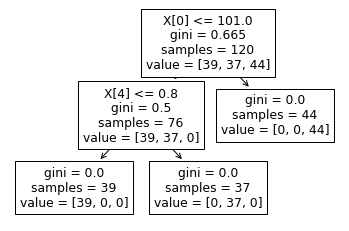

In [29]:
tree.plot_tree(model);

#### The code below tries to make the decision tree more interpretable by adding in feature and class names (as well as setting filled = True).

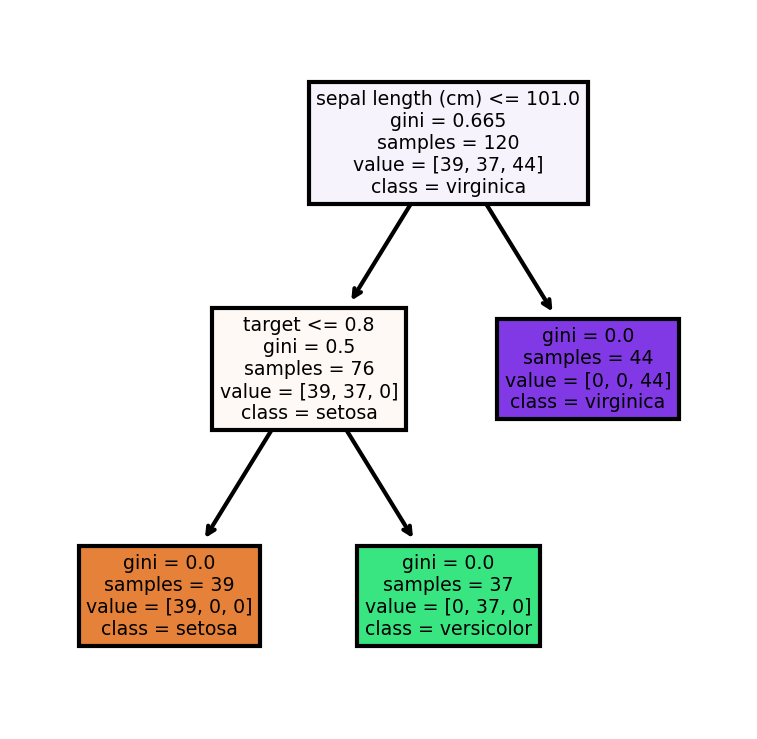

In [30]:
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)','target']
cn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,3), dpi=300)
tree.plot_tree(model,feature_names = fn, class_names=cn,filled = True);
fig.savefig('imagename.png')

## Visualize Decision Trees using Graphviz

In [34]:
import graphviz
from sklearn.tree import export_graphviz
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)','target']
cn=['setosa', 'versicolor', 'virginica']
export_graphviz(model,out_file="tree.dot",feature_names = fn, class_names=cn,filled = True)

from IPython.display import display
with open("tree.dot") as f:
    dot_graph = f.read()
g = graphviz.Source(dot_graph)
g.view()

'Source.gv.pdf'